In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import os
from Poincare import *
from Poincare import Section
import math
from surface_dynamics.all import *
from time import time

In [2]:
#Code from Sunrose
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [3]:
def vectors(perm, length = 200):
    a = str(perm)
    h, v = a.split("\n")
    S = SymmetricGroup(len(h))
    T = translation_surfaces.origami(S(h), S(v))
    T = T.erase_marked_points()
    sc_list = T.saddle_connections(length)
    slopes_all = []
    for item in sc_list:
        vec = item.holonomy().n()
        direction = item.direction
        if vec not in slopes_all:
            if vec[0] >= -length/20 and vec[0] <= length/20:
                if vec[1] >= -length/20 and vec[1] <= length/20:
                    slopes_all.append(item.holonomy().n())         
    vecs = []
    for vec in slopes_all:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    return vecs

In [4]:
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [5]:
permutations = perms_list(7)
len(permutations)

92

In [ ]:
for i in range(len(permutations)):
    n_squares = 7
    perm = permutations[i]
    vecs = vectors(perm,30000)
    try:
        comp(perm, vecs, 7, i)
    except:
        continue

In [6]:
perm = permutations[0]
vecs0 = vectors(perm, 6000)
dx = 0.001

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[array([[1],
       [0]]), array([[ 1.        ],
       [-3.89855072]]), array([[ 1.  ],
       [-3.85]]), array([[ 1.   ],
       [-3.875]]), array([[0],
       [1]]), array([[ 1.        ],
       [-3.66666667]]), array([[ 1. ],
       [-3.9]]), array([[ 1],
       [-4]]), array([[ 1. ],
       [-3.8]]), array([[ 1.        ],
       [-3.85714286]])]
No saddle vec for eigenvector [[ 1.        ]
 [-3.89855072]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[array([[1],
       [0]]), array([[ 1.        ],
       [-4.46666667]]), array([[ 1.        ],
       [-3.88636364]]), array([[ 1.   ],
       [-3.875]]), array([[0],
       [1]]), array([[ 1],
       [-3]]), array([[ 1. ],
       [-4.5]]), array([[ 1],
       [-4]]), array([[ 1],
       [-5]]), array([[ 1.        ],
       [-3.88888889]])]
No saddle vec for eigenvector [[ 1.        ]
 [-3.88636364]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[array([[1],
       [0]]), array([[ 1.        ],
       [-0.74193548]]), array([[ 1.     

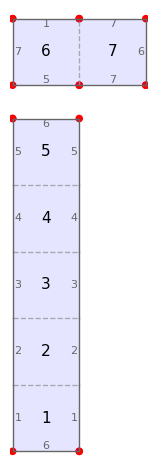

In [7]:
for i in range(20):
    try:
        alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)
        break
    except:
        continue
perm.show()

In [8]:
alphas

[2.0, 1490.0, 740.0, 298.0, 6.0, 17646.0, 250.0, 732.0, 14.0, 518.0]

In [15]:
i = 2
n_squares = 7
index = 0
vecs, x_vals, m0, m1, x0, y0, dx_y = setup(alphas[i], Cs[i], eigs[i], vecs0, dx)
t1 = time()
df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)
t2 = time()
print(t2-t1)

11110
5555


ValueError: No winner

In [ ]:
plot(df, vecs, Cs[i], 1, n_squares, index, test = True)

In [ ]:
sec_list = sec_setup(df, dx_y)
secs = sec_comp(sec_list, dx)
times = time_comp(secs)
pdf(list(df["time"]), times, dx)

In [9]:
54 * 2*math.pi**(2/3)

231.66317488799075

In [15]:
df[df["lab"] != 0]

,x,y,lab,vec,time


In [12]:
df

,x,y,lab,vec,time
0,0.002,2.251586e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",2.216215e-04
1,0.003,2.249328e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.477478e-04
2,0.003,2.249330e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.477477e-04
3,0.004,2.247070e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.108110e-04
4,0.004,2.247072e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.108109e-04
...,...,...,...,...,...
497868,0.999,2.250316e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436884e-07
497869,0.999,2.252352e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436880e-07
497870,0.999,2.254388e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436876e-07
497871,0.999,2.256424e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436872e-07


In [20]:
a = np.array([[2],[3]])
b = None
if type(a) == type(None):
    print(1)

In [16]:
type(b)

<class 'NoneType'>